# Smoothify Usage Examples

This notebook demonstrates how to use the Smoothify library to smooth geometries derived from raster data. Smoothify transforms jagged polygons and lines resulting from raster-to-vector conversion into smooth, visually appealing features.

## Setup and Imports

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from smoothify import smoothify

# Set up plotting style
plt.rcParams["figure.figsize"] = (12, 6)

## Example 1: Basic Polygon Smoothing

Let's start with a simple pixelated polygon that mimics the output from raster-to-vector conversion.

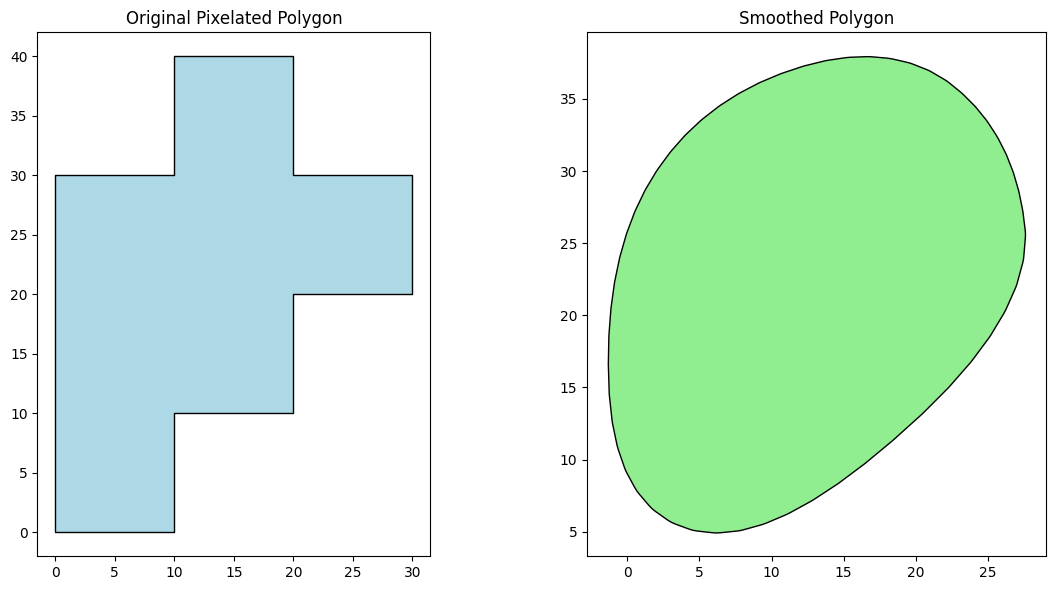

Original area: 700.00
Smoothed area: 700.00


In [2]:
# Create a pixelated polygon (simulating raster-derived geometry)
pixelated_polygon = Polygon(
    [
        (0, 0),
        (10, 0),
        (10, 10),
        (20, 10),
        (20, 20),
        (30, 20),
        (30, 30),
        (20, 30),
        (20, 40),
        (10, 40),
        (10, 30),
        (0, 30),
        (0, 20),
        (0, 10),
        (0, 0),
    ]
)

# Smooth the polygon
smoothed_polygon = smoothify(
    geom=pixelated_polygon,
    segment_length=10.0,  # Raster resolution
    smooth_iterations=3,
    preserve_area=True,
)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2)
gpd.GeoSeries([pixelated_polygon]).plot(ax=ax1, color="lightblue", edgecolor="black")
ax1.set_title("Original Pixelated Polygon")
ax1.set_aspect("equal")

gpd.GeoSeries([smoothed_polygon]).plot(ax=ax2, color="lightgreen", edgecolor="black")
ax2.set_title("Smoothed Polygon")
ax2.set_aspect("equal")

plt.tight_layout()
plt.show()

print(f"Original area: {pixelated_polygon.area:.2f}")
print(f"Smoothed area: {smoothed_polygon.area:.2f}")

## Example 2: LineString Smoothing

Smoothify works with LineStrings too, perfect for road networks or streams derived from raster data.

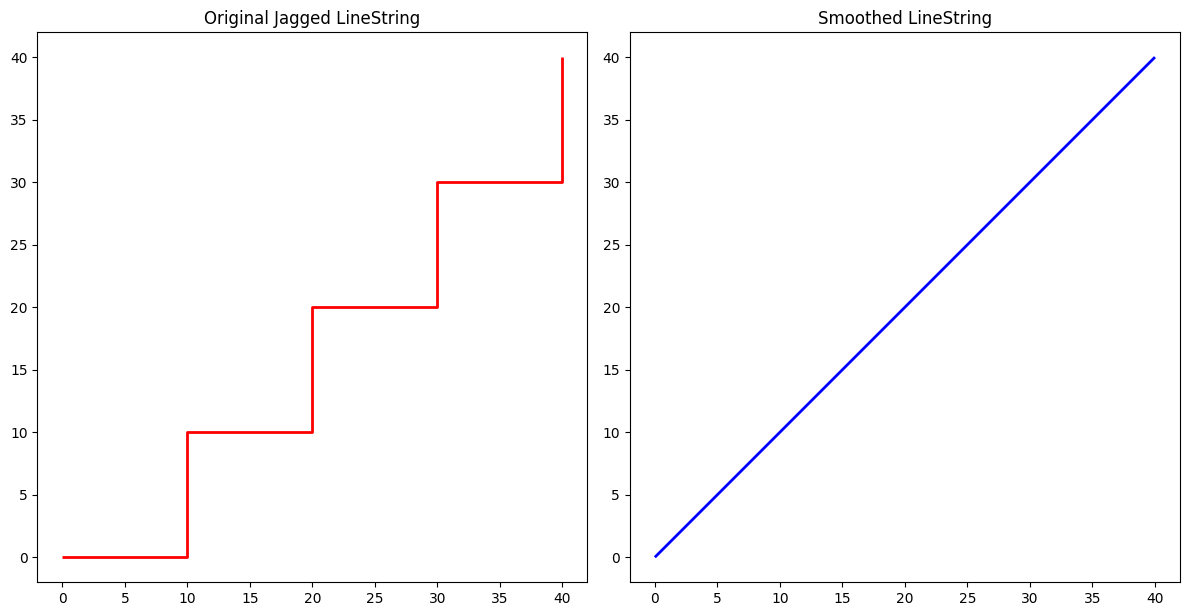

In [3]:
# Create a jagged linestring
jagged_line = LineString(
    [
        (0, 0),
        (10, 0),
        (10, 10),
        (20, 10),
        (20, 20),
        (30, 20),
        (30, 30),
        (40, 30),
        (40, 40),
    ]
)

# Smooth the linestring
smoothed_line = smoothify(geom=jagged_line, segment_length=10.0, smooth_iterations=3)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2)
gpd.GeoSeries([jagged_line]).plot(ax=ax1, color="red", linewidth=2)
ax1.set_title("Original Jagged LineString")
ax1.set_aspect("equal")

gpd.GeoSeries([smoothed_line]).plot(ax=ax2, color="blue", linewidth=2)
ax2.set_title("Smoothed LineString")
ax2.set_aspect("equal")

plt.tight_layout()
plt.show()

## Example 3: GeoDataFrame Processing

The most common use case - processing a GeoDataFrame loaded from a file.

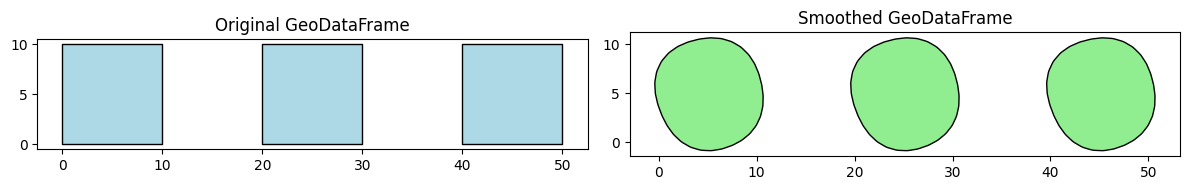

   id   type                                           geometry
0   1  water  POLYGON ((0.40624 2.58963, 0.31859 2.78728, -0...
1   1  water  POLYGON ((20.40624 2.58963, 20.31859 2.78728, ...
2   1  water  POLYGON ((40.40624 2.58963, 40.31859 2.78728, ...


In [4]:
# Create a sample GeoDataFrame with multiple pixelated polygons
polygons = [
    Polygon([(0, 0), (10, 0), (10, 10), (0, 10)]),
    Polygon([(20, 0), (30, 0), (30, 10), (20, 10)]),
    Polygon([(40, 0), (50, 0), (50, 10), (40, 10)]),
]

gdf = gpd.GeoDataFrame(
    {"id": [1, 2, 3], "type": ["water", "water", "water"]}, geometry=polygons
)

# Smooth all geometries in the GeoDataFrame
smoothed_gdf = smoothify(
    geom=gdf,
    segment_length=10.0,
    smooth_iterations=3,
    num_cores=1,  # Use 0 for all available cores, or specify a number
)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2)
gdf.plot(ax=ax1, color="lightblue", edgecolor="black")
ax1.set_title("Original GeoDataFrame")
ax1.set_aspect("equal")

smoothed_gdf.plot(ax=ax2, color="lightgreen", edgecolor="black")
ax2.set_title("Smoothed GeoDataFrame")
ax2.set_aspect("equal")

plt.tight_layout()
plt.show()

print(smoothed_gdf)

## Example 4: Auto-detecting Segment Length

When you don't know the original raster resolution, Smoothify can automatically detect it from the geometry.

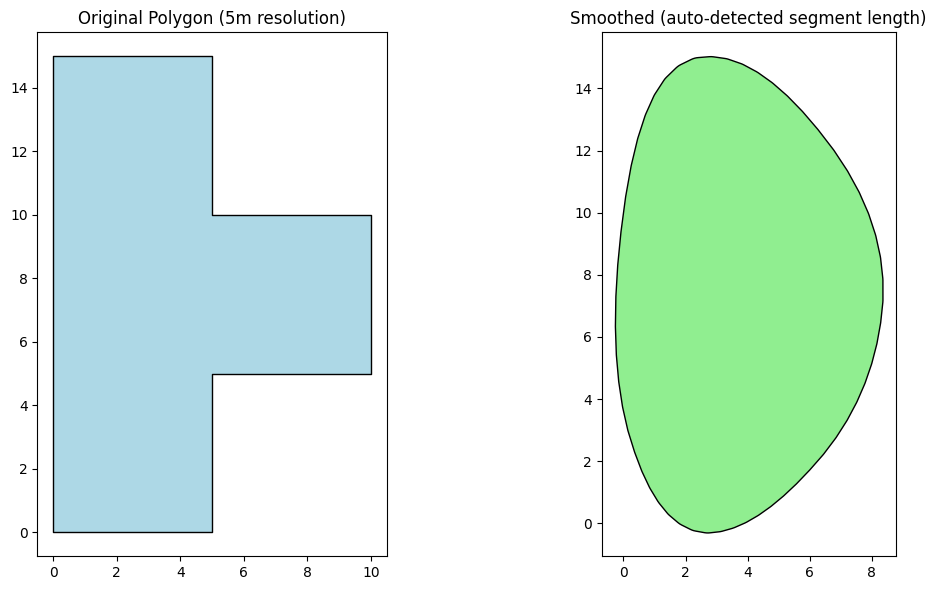

In [5]:
# Create a polygon from a 5m raster
polygon_5m = Polygon(
    [(0, 0), (5, 0), (5, 5), (10, 5), (10, 10), (5, 10), (5, 15), (0, 15), (0, 0)]
)

# Smooth without specifying segment_length - it will be auto-detected
smoothed_auto = smoothify(geom=polygon_5m, smooth_iterations=3)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2)
gpd.GeoSeries([polygon_5m]).plot(ax=ax1, color="lightblue", edgecolor="black")
ax1.set_title("Original Polygon (5m resolution)")
ax1.set_aspect("equal")

gpd.GeoSeries([smoothed_auto]).plot(ax=ax2, color="lightgreen", edgecolor="black")
ax2.set_title("Smoothed (auto-detected segment length)")
ax2.set_aspect("equal")

plt.tight_layout()
plt.show()

## Example 5: Effect of Different Iteration Counts

The `smooth_iterations` parameter controls how smooth the output will be.

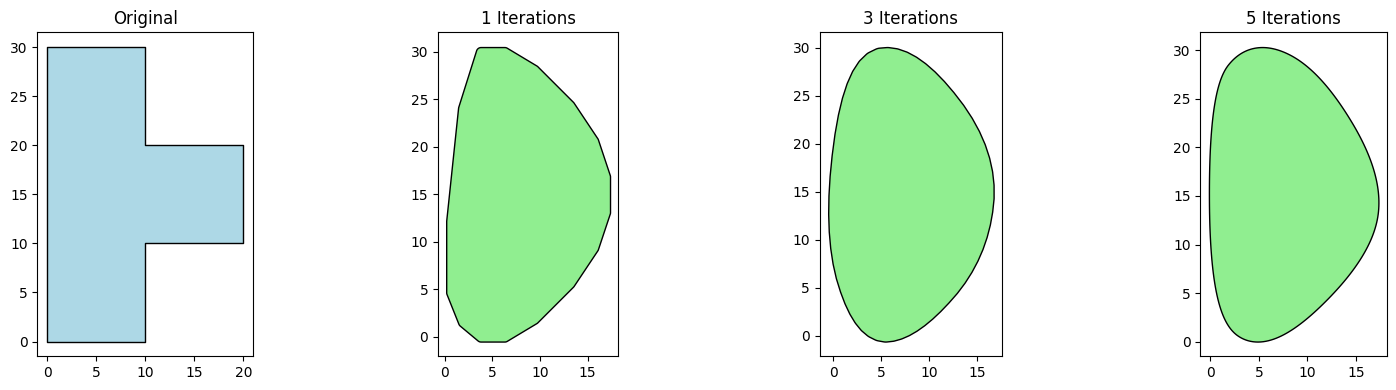

In [6]:
# Create a test polygon
test_polygon = Polygon(
    [(0, 0), (10, 0), (10, 10), (20, 10), (20, 20), (10, 20), (10, 30), (0, 30), (0, 0)]
)

# Apply different iteration counts
iterations = [1, 3, 5]
results = []

for iters in iterations:
    smoothed = smoothify(
        geom=test_polygon, segment_length=10.0, smooth_iterations=iters
    )
    results.append(smoothed)

# Visualize
fig, axes = plt.subplots(1, len(iterations) + 1, figsize=(16, 4))

gpd.GeoSeries([test_polygon]).plot(ax=axes[0], color="lightblue", edgecolor="black")
axes[0].set_title("Original")
axes[0].set_aspect("equal")

for i, (iters, smoothed) in enumerate(zip(iterations, results, strict=False), 1):
    gpd.GeoSeries([smoothed]).plot(ax=axes[i], color="lightgreen", edgecolor="black")
    axes[i].set_title(f"{iters} Iterations")
    axes[i].set_aspect("equal")

plt.tight_layout()
plt.show()

## Example 6: Polygon with Holes

Smoothify properly handles polygons with interior holes (donuts).

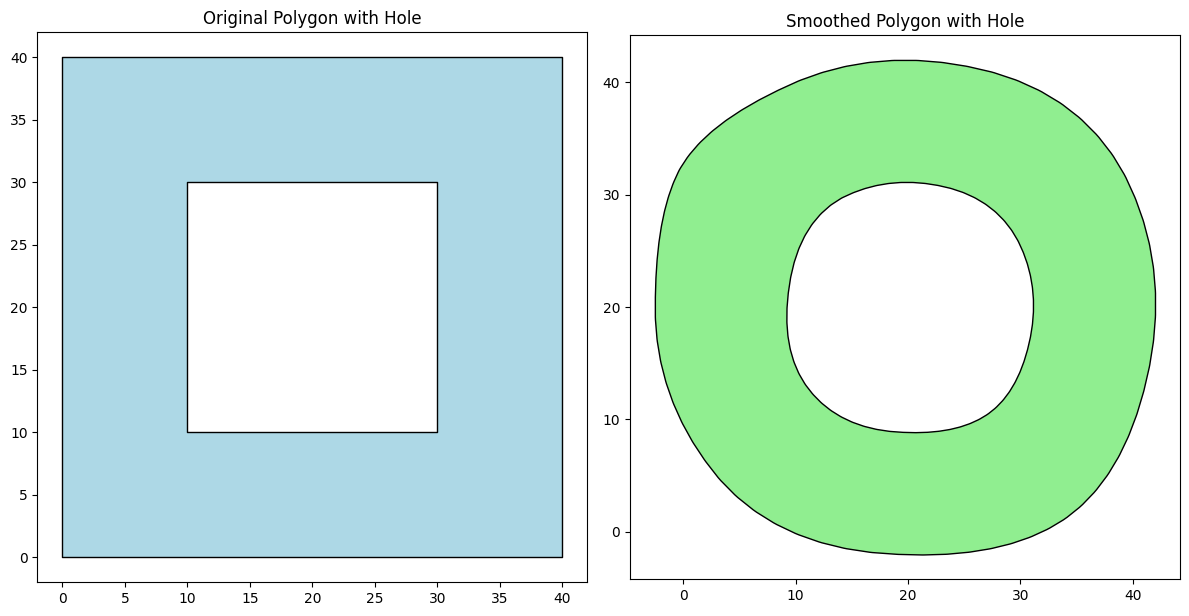

In [7]:
# Create a polygon with a hole
exterior = [(0, 0), (40, 0), (40, 40), (0, 40), (0, 0)]
hole = [(10, 10), (30, 10), (30, 30), (10, 30), (10, 10)]
polygon_with_hole = Polygon(exterior, [hole])

# Smooth the polygon (both exterior and hole)
smoothed_with_hole = smoothify(
    geom=polygon_with_hole, segment_length=10.0, smooth_iterations=3
)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2)
gpd.GeoSeries([polygon_with_hole]).plot(ax=ax1, color="lightblue", edgecolor="black")
ax1.set_title("Original Polygon with Hole")
ax1.set_aspect("equal")

gpd.GeoSeries([smoothed_with_hole]).plot(ax=ax2, color="lightgreen", edgecolor="black")
ax2.set_title("Smoothed Polygon with Hole")
ax2.set_aspect("equal")

plt.tight_layout()
plt.show()

## Example 7: Processing Multiple Geometry Types

You can smooth a list containing different geometry types.

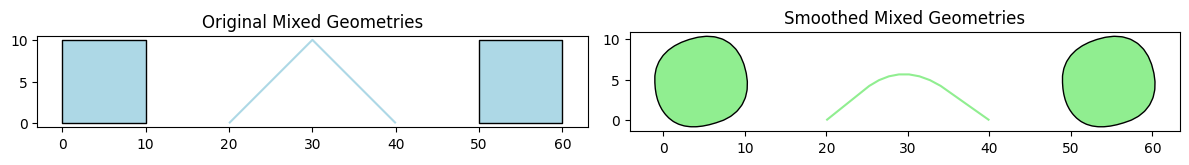

In [8]:
# Create a mix of geometry types
geometries = [
    Polygon([(0, 0), (10, 0), (10, 10), (0, 10)]),
    LineString([(20, 0), (30, 10), (40, 0)]),
    Polygon([(50, 0), (60, 0), (60, 10), (50, 10)]),
]

# Smooth all geometries
smoothed_geometries = smoothify(geom=geometries, segment_length=9, smooth_iterations=3)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2)
gpd.GeoSeries(geometries).plot(ax=ax1, color="lightblue", edgecolor="black")
ax1.set_title("Original Mixed Geometries")
ax1.set_aspect("equal")

gpd.GeoSeries(smoothed_geometries).plot(ax=ax2, color="lightgreen", edgecolor="black")
ax2.set_title("Smoothed Mixed Geometries")
ax2.set_aspect("equal")

plt.tight_layout()
plt.show()

## Example 8: Parallel Processing for Large Datasets

When working with large GeoDataFrames, use parallel processing for better performance.

In [9]:
import time

# Create a larger dataset for benchmarking
large_polygons = []
for i in range(1000):
    x_offset = (i % 10) * 15
    y_offset = (i // 10) * 15
    poly = Polygon(
        [
            (x_offset, y_offset),
            (x_offset + 10, y_offset),
            (x_offset + 10, y_offset + 10),
            (x_offset, y_offset + 10),
        ]
    )
    large_polygons.append(poly)

large_gdf = gpd.GeoDataFrame(geometry=large_polygons)

# Process with single core
start_time = time.time()
smoothed_serial = smoothify(
    geom=large_gdf, segment_length=10.0, smooth_iterations=3, num_cores=1
)
serial_time = time.time() - start_time

# Process with all available cores
start_time = time.time()
smoothed_parallel = smoothify(
    geom=large_gdf,
    segment_length=10.0,
    smooth_iterations=3,
    num_cores=0,  # Use all available cores
)
parallel_time = time.time() - start_time

print("Processing 1000 polygons:")
print(f"  Serial (1 core): {serial_time:.2f} seconds")
print(f"  Parallel (all cores): {parallel_time:.2f} seconds")
print(f"  Speedup: {serial_time / parallel_time:.2f}x")

Processing 1000 polygons:
  Serial (1 core): 0.98 seconds
  Parallel (all cores): 0.83 seconds
  Speedup: 1.18x


## Example 9: Merging Adjacent Geometries

Use the merge options to combine adjacent geometries before smoothing for better results.

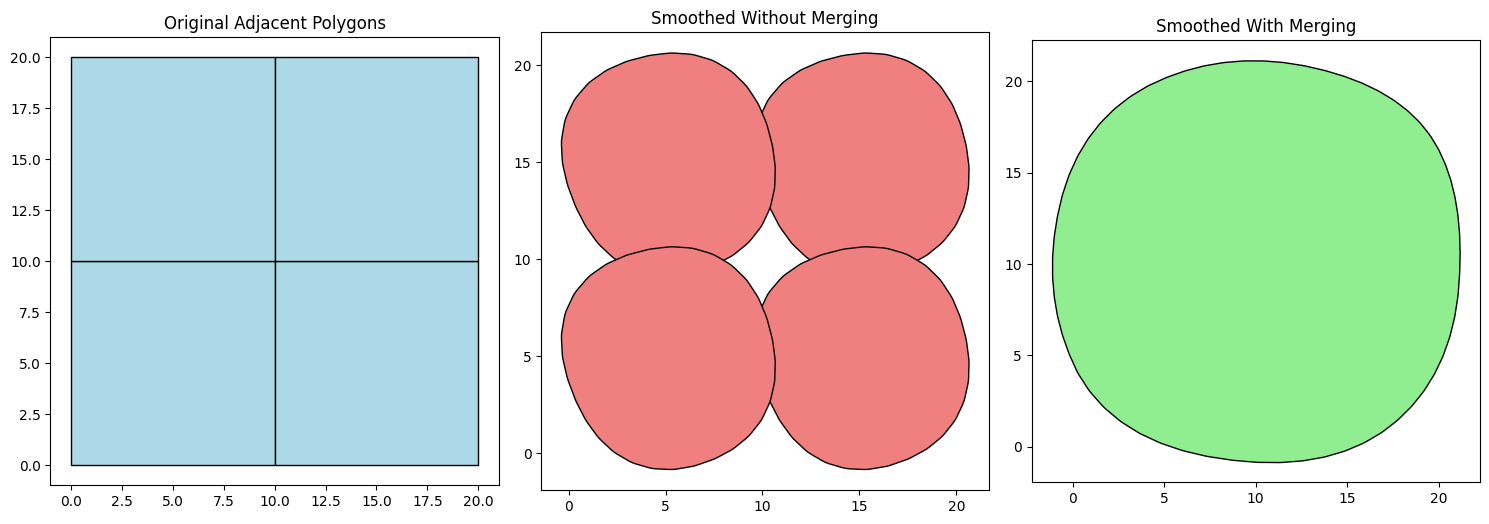

In [10]:
# Create adjacent polygons that share edges
adjacent_polygons = [
    Polygon([(0, 0), (10, 0), (10, 10), (0, 10)]),
    Polygon([(10, 0), (20, 0), (20, 10), (10, 10)]),
    Polygon([(0, 10), (10, 10), (10, 20), (0, 20)]),
    Polygon([(10, 10), (20, 10), (20, 20), (10, 20)]),
]

# Smooth without merging
smoothed_no_merge = smoothify(
    geom=adjacent_polygons,
    segment_length=10.0,
    smooth_iterations=3,
    merge_collection=False,
)

# Smooth with merging
smoothed_with_merge = smoothify(
    geom=adjacent_polygons,
    segment_length=10.0,
    smooth_iterations=3,
    merge_collection=True,
)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gpd.GeoSeries(adjacent_polygons).plot(ax=axes[0], color="lightblue", edgecolor="black")
axes[0].set_title("Original Adjacent Polygons")
axes[0].set_aspect("equal")

gpd.GeoSeries(smoothed_no_merge).plot(ax=axes[1], color="lightcoral", edgecolor="black")
axes[1].set_title("Smoothed Without Merging")
axes[1].set_aspect("equal")

# Note: smoothed_with_merge might be a single merged geometry
if isinstance(smoothed_with_merge, list):
    gpd.GeoSeries(smoothed_with_merge).plot(
        ax=axes[2], color="lightgreen", edgecolor="black"
    )
else:
    gpd.GeoSeries([smoothed_with_merge]).plot(
        ax=axes[2], color="lightgreen", edgecolor="black"
    )
axes[2].set_title("Smoothed With Merging")
axes[2].set_aspect("equal")

plt.tight_layout()
plt.show()